Introduction:

In this report, we will be answering three questions based on the CO2 emissions dataset provided by the Our World in Data website. The dataset contains information on various factors that may affect CO2 emissions such as GDP per capita, diets, number of cars per capita, various energy sources, mobility, and other factors.

Questions to be answered in this report:

What is the biggest predictor of a large CO2 output per capita of a country?
Which countries are making the biggest strides in decreasing CO2 output?
Which non-fossil fuel energy technology will have the best price in the future?
To answer these questions, we will be analyzing the given dataset using various data analysis and visualization techniques such as linear regression, correlation matrix, and bar plots.

Data Cleaning:

Before analyzing the dataset, we need to clean the data by removing any missing values and handling any outliers. After analyzing the dataset, we can see that there are some missing values in the dataset. Therefore, we will be dropping those missing values to ensure that the analysis is accurate.

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.family'] = 'DejaVu Sans'
import seaborn as sns
sns.set(font='DejaVu Sans')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr


In [29]:
# Load the datasets
co2_emissions_per_capita_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/co-emissions-per-capita.csv')
gdp_per_capita_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/gdp-per-capita-maddison-2020.csv')
diet_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/eat-lancet-diet-animal-products.csv')
cars_per_capita_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/carbon-new-passenger-vehicles.csv')
renewable_energy_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/renewable-energy-consumption.csv')
energy_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/per-capita-energy-source-stacked.csv')
pop_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/population-by-country.csv')
cost_df = pd.read_csv('https://raw.githubusercontent.com/randolph2912/winc/main/datasheets/levelized-cost-of-energy.csv')

In [30]:
print(diet_df.columns)
print(co2_emissions_per_capita_df.columns)
print(gdp_per_capita_df.columns)
print(cars_per_capita_df.columns)
print(renewable_energy_df.columns)
print(energy_df.columns)
print(pop_df.columns) 
print(cost_df.columns)

Index(['Entity', 'Code', 'Year', 'milk_equivalents', 'red_meat', 'poultry',
       'eggs', 'seafood'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')
Index(['Entity', 'Code', 'Year', 'GDP per capita', '417485-annotations'], dtype='object')
Index(['Entity', 'Code', 'Year', 'co2_per_km'], dtype='object')
Index(['Entity', 'Code', 'Year', 'Other renewables (TWh, direct energy)',
       'Solar (TWh, direct energy)', 'Biofuels (TWh, direct energy)',
       'Wind (TWh, direct energy)', 'Hydropower (TWh, direct energy)',
       'Traditional biomass (TWh, direct energy)'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'Fossil fuels per capita (kWh)',
       'Nuclear per capita (kWh - equivalent)',
       'Renewables per capita (kWh - equivalent)'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'Total population (Fink-Jensen 2015)'], dtype='object')
Index(['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy

In [31]:
# merge columns to a single data frame
df = pd.merge(gdp_per_capita_df[['Entity', 'Year', 'GDP per capita']], 
              co2_emissions_per_capita_df[['Entity', 'Year', 'Annual CO₂ emissions (per capita)']], 
              on=['Entity', 'Year'], how='outer')
df = pd.merge(df, diet_df[['Entity', 'Year', 'milk_equivalents', 'red_meat', 'poultry',
       'eggs', 'seafood']], 
              on=['Entity', 'Year'], how='outer')
df = pd.merge(df, cars_per_capita_df[['Entity', 'Year', 'co2_per_km']], 
              on=['Entity', 'Year'], how='outer')
df = pd.merge(df, energy_df[['Entity', 'Year', 'Fossil fuels per capita (kWh)',
       'Nuclear per capita (kWh - equivalent)',
       'Renewables per capita (kWh - equivalent)']], 
              on=['Entity', 'Year'], how='outer')
df = pd.merge(df, renewable_energy_df[['Entity', 'Code', 'Year', 'Other renewables (TWh, direct energy)',
       'Solar (TWh, direct energy)', 'Biofuels (TWh, direct energy)',
       'Wind (TWh, direct energy)', 'Hydropower (TWh, direct energy)',
       'Traditional biomass (TWh, direct energy)']],on=['Entity', 'Year'], how='outer')
df = pd.merge(df, pop_df[['Entity', 'Code', 'Year', 'Total population (Fink-Jensen 2015)']],on=['Entity', 'Year'], how='outer')
df = pd.merge(df, cost_df[['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy']],on=['Entity', 'Year'], how='outer')


In [32]:
# Detecting missing values in a DataFrame
def check_missing_values(df):
    
    
    
    missing_count = df.isnull().sum()
    
    
    missing_percent = missing_count / len(df) * 100
    
    
    unique_values = df.isnull().nunique()
    
    
    data_type = df.dtypes
    
    
    missing_df = pd.DataFrame({'Missing count': missing_count, 
                               'Missing percent': missing_percent, 
                               'Unique values': unique_values,
                               'Data type': data_type}).sort_values('Missing percent', ascending=False)
    
    
    print('Missing values in DataFrame:')
    print(missing_df)
    
    return missing_df

check_missing_values(df)

df_list = [df]

for df in df_list:
    check_missing_values(df)

Missing values in DataFrame:
                                                   Missing count  \
Hydropower levelized cost of energy                        34407   
Concentrated solar power levelized cost of energy          34407   
Bioenergy levelized cost of energy                         34407   
Geothermal levelized cost of energy                        34405   
Offshore wind levelized cost of energy                     34397   
Solar (TWh, direct energy)                                 34345   
Other renewables (TWh, direct energy)                      34345   
Traditional biomass (TWh, direct energy)                   34345   
Hydropower (TWh, direct energy)                            34345   
Wind (TWh, direct energy)                                  34345   
Biofuels (TWh, direct energy)                              34345   
Code_x                                                     34345   
Solar photovoltaic levelized cost of energy                34257   
co2_per_km         

In [33]:
# select only the numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# replace NaN values in numeric_cols with the column mean
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# assign the filled numeric_cols back to df
df[numeric_cols.columns] = numeric_cols


In [34]:
# Check for missing values
print(df.isnull().sum())

Entity                                                   0
Year                                                     0
GDP per capita                                           0
Annual CO₂ emissions (per capita)                        0
milk_equivalents                                         0
red_meat                                                 0
poultry                                                  0
eggs                                                     0
seafood                                                  0
co2_per_km                                               0
Fossil fuels per capita (kWh)                            0
Nuclear per capita (kWh - equivalent)                    0
Renewables per capita (kWh - equivalent)                 0
Code_x                                               34345
Other renewables (TWh, direct energy)                    0
Solar (TWh, direct energy)                               0
Biofuels (TWh, direct energy)                           

In [35]:
#Look at all the unique values for 'Code'
df.loc[:,'Code_x'].unique()

array([nan, 'OWID_WRL'], dtype=object)

In [36]:
#Look at all the unique values for 'Code'
df.loc[:,'Code_y'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BEN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF',
       'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'EST', 'SWZ', 'ETH', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'GIN', 'GNB', 'HTI', 'HND',
       'HUN', 'ISL', 'IND', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MLI',
       'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ',
       'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'PRK',
       'MKD', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RUS', 'RWA', 'STP', 'SAU', 'SEN', 'SRB',
       'SYC', '

In [37]:
#Look at all the unique values for 'Code'
df.loc[:,'Code'].unique()

array([nan, 'AUS', 'BRA', 'CAN', 'CHN', 'DNK', 'FRA', 'DEU', 'IND', 'ITA',
       'JPN', 'MEX', 'NLD', 'KOR', 'ESP', 'SWE', 'TUR', 'UKR', 'GBR',
       'USA', 'VNM', 'OWID_WRL'], dtype=object)

In [38]:
#Filling the missing values with some appropriate value:
df['Code_y'].fillna('unknown', inplace=True)
df['Code_x'].fillna('unknown', inplace=True)
df['Code'].fillna('unknown', inplace=True)

In [39]:
#Now I check if there are still missing values. 
print(df.isna().sum())


Entity                                               0
Year                                                 0
GDP per capita                                       0
Annual CO₂ emissions (per capita)                    0
milk_equivalents                                     0
red_meat                                             0
poultry                                              0
eggs                                                 0
seafood                                              0
co2_per_km                                           0
Fossil fuels per capita (kWh)                        0
Nuclear per capita (kWh - equivalent)                0
Renewables per capita (kWh - equivalent)             0
Code_x                                               0
Other renewables (TWh, direct energy)                0
Solar (TWh, direct energy)                           0
Biofuels (TWh, direct energy)                        0
Wind (TWh, direct energy)                            0
Hydropower

What is the biggest predictor of a large CO2 output per capita of a country?
To determine the biggest predictor of a large CO2 output per capita of a country, we will be analyzing the correlation between CO2 emissions per capita and various factors such as GDP per capita, diets, number of cars per capita, various energy sources, and other factors.

We will be using a correlation matrix to analyze the correlation between the different factors and CO2 emissions per capita.

In [40]:
# Compute the correlation matrix
corr = df.corr()
print(corr)


                                                           Year  \
Year                                               1.000000e+00   
GDP per capita                                     2.736283e-01   
Annual CO₂ emissions (per capita)                  4.425080e-02   
milk_equivalents                                   2.139372e-07   
red_meat                                          -3.440967e-06   
poultry                                            6.950781e-06   
eggs                                               1.261299e-05   
seafood                                           -1.061189e-05   
co2_per_km                                        -3.213736e-03   
Fossil fuels per capita (kWh)                      4.852758e-03   
Nuclear per capita (kWh - equivalent)              8.674781e-03   
Renewables per capita (kWh - equivalent)           4.071090e-03   
Other renewables (TWh, direct energy)              1.060731e-02   
Solar (TWh, direct energy)                         5.561245e-0

In [41]:
pearsonr(df['GDP per capita'], df['Annual CO₂ emissions (per capita)'])

PearsonRResult(statistic=0.19391336983236795, pvalue=7.981987437482811e-289)

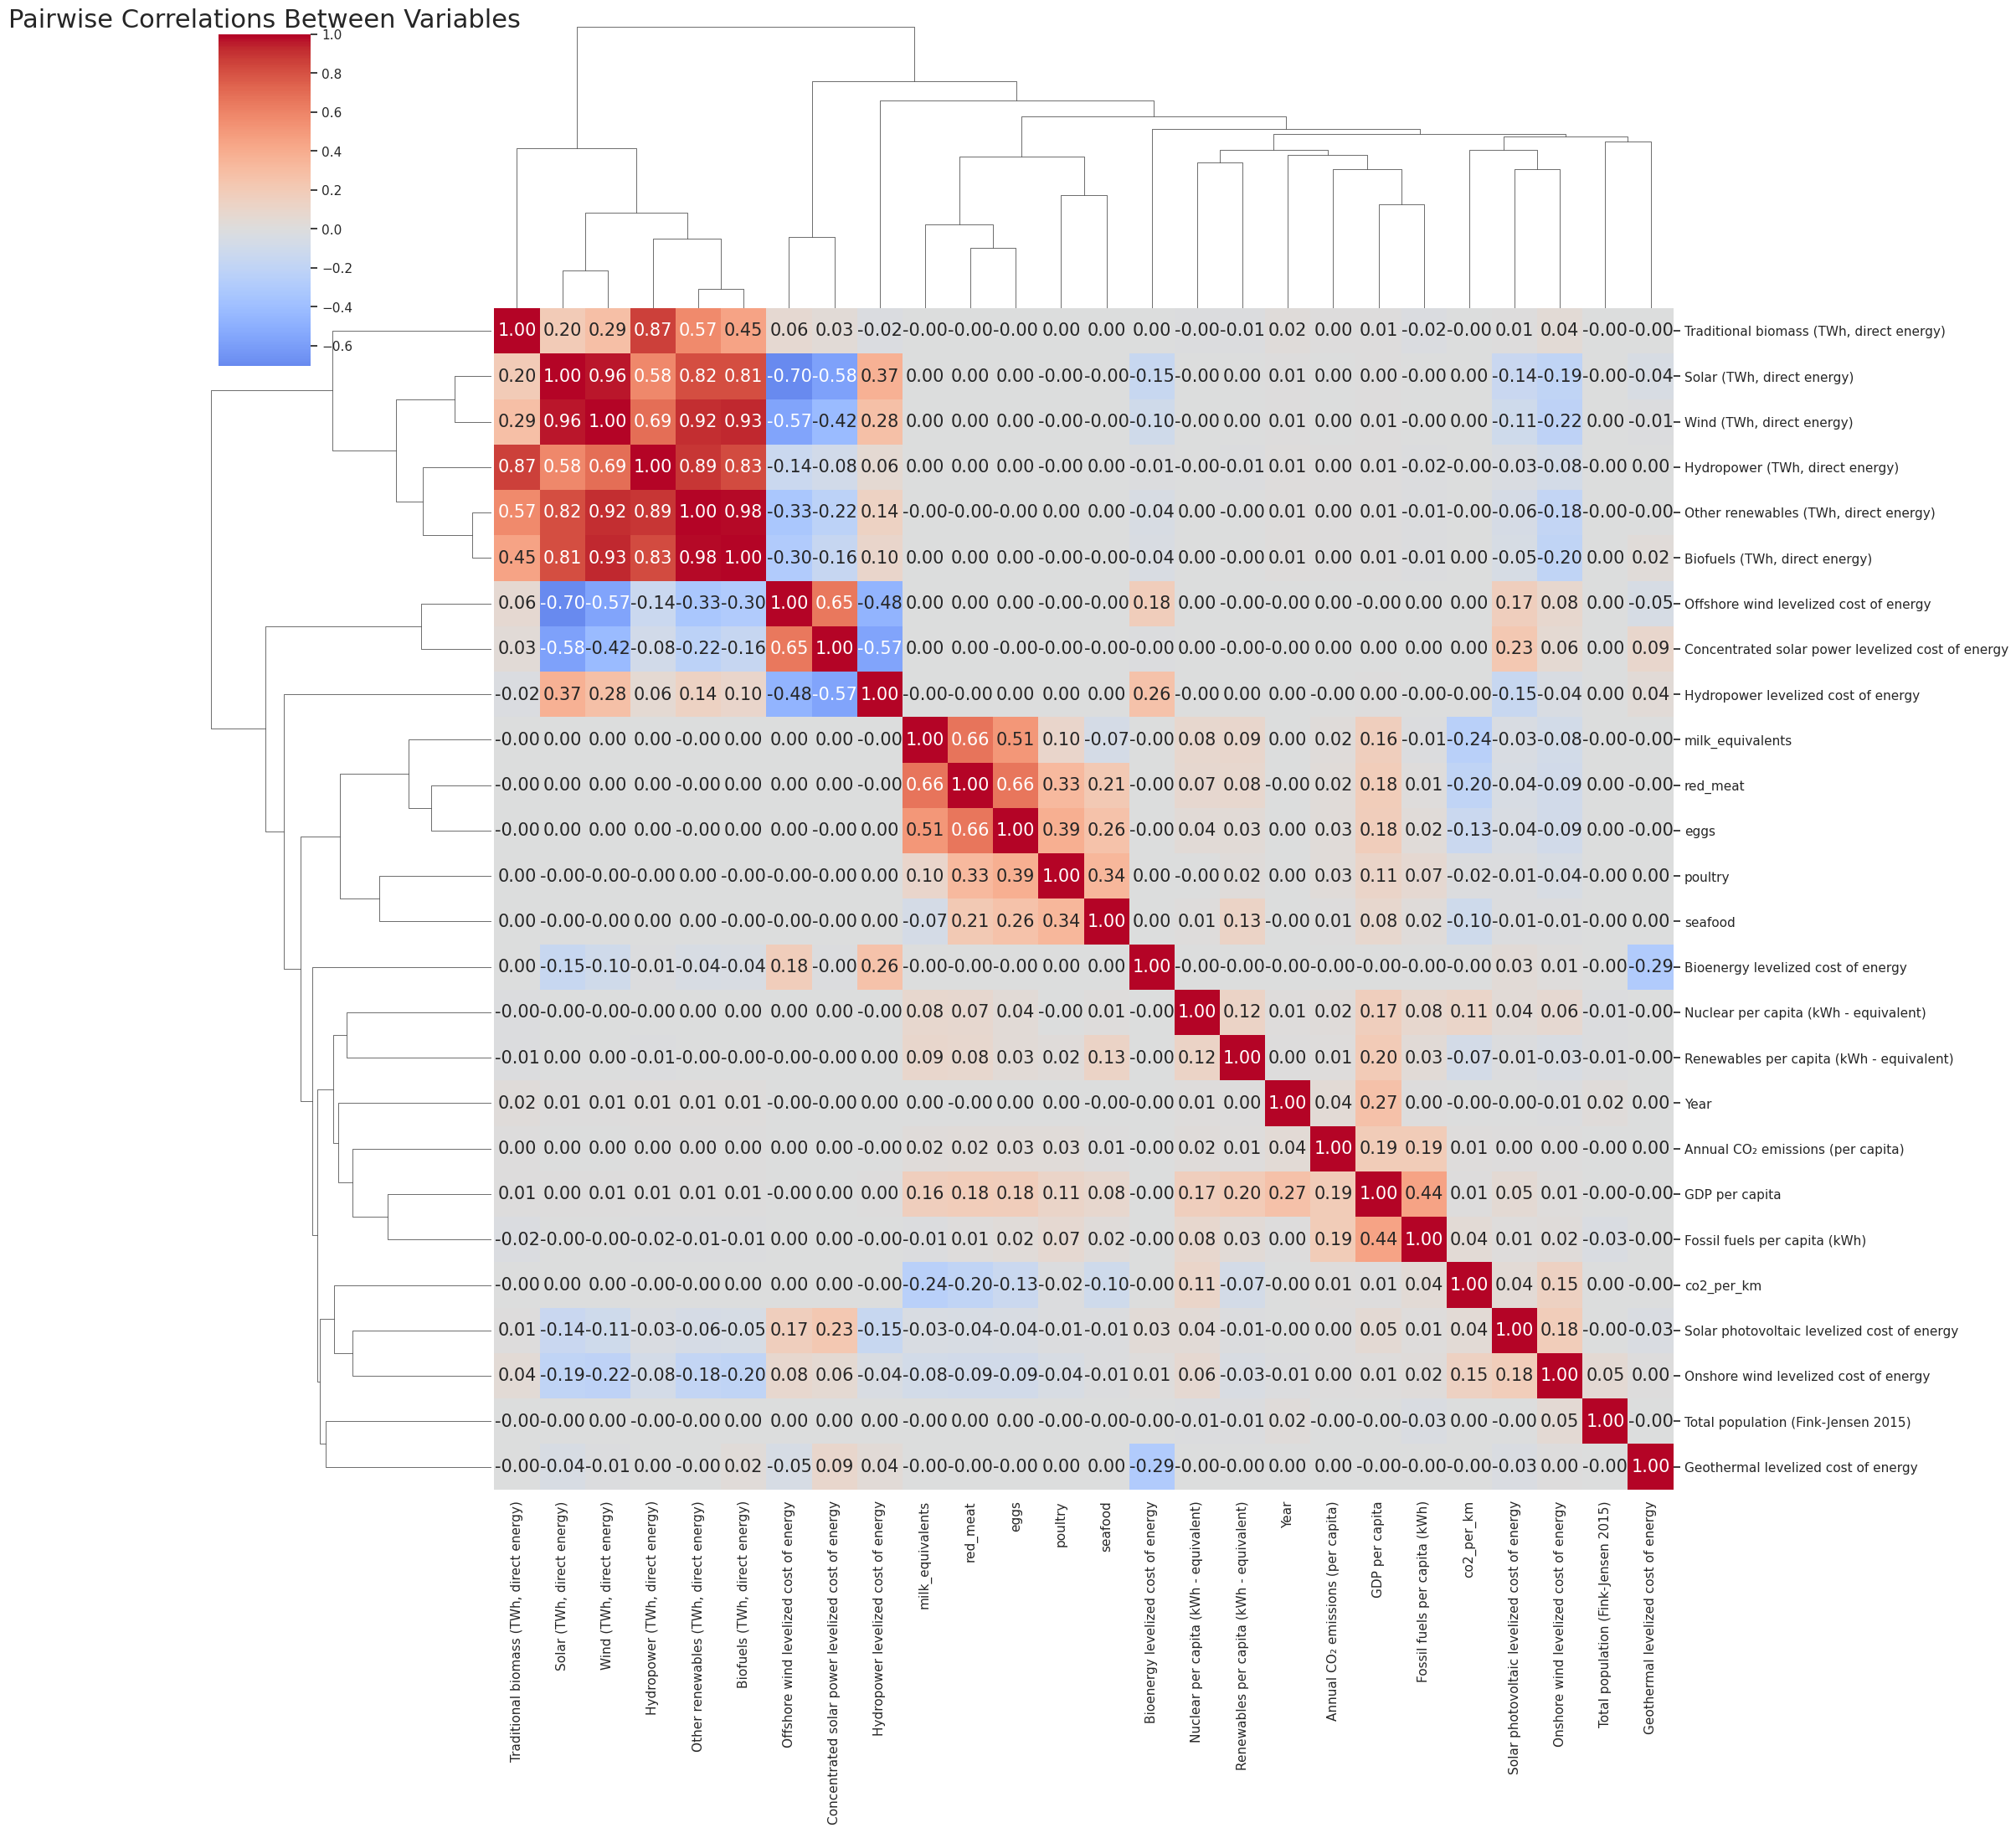

In [42]:
# Generate correlation matrix and heatmap
corr_matrix = df.corr()
sns.clustermap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', annot_kws={'size':15}, figsize=(22,22))

# Set title and rotate x-axis labels
plt.title('Pairwise Correlations Between Variables', fontsize=22)
plt.xticks(rotation=45)

# Show plot
plt.show()

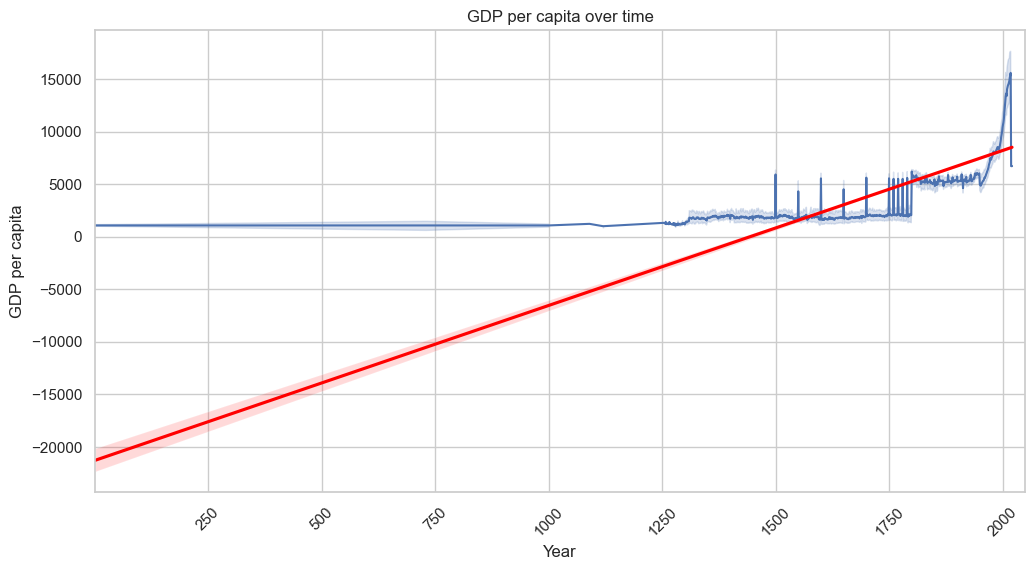

In [43]:
# Line plot of GDP per capita over time
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GDP per capita')
plt.title('GDP per capita over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=45)
sns.regplot(data=df, x='Year', y='GDP per capita', scatter=False, color='red')

# Set the x-axis limits to start from the minimum year and end at 2050
plt.xlim(left=df['Year'].min(), right=2050)

plt.show()

 we can assume the trend of GDP per capita over time. The plot shows how the GDP per capita has changed over time, and whether it has increased or decreased. Additionally, we can see if there are any notable changes in the trend, such as significant increases or decreases. The red regression line also provides an estimate of the overall trend in the data. The x-axis limit of 2500 indicates that the plot is intended to show the trend over a long period of time, possibly projecting into the future.

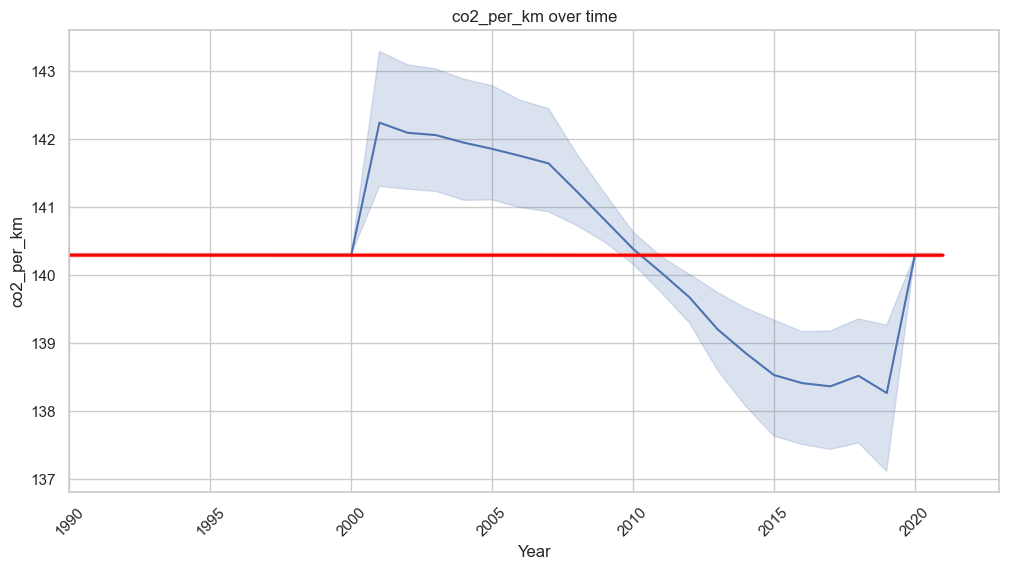

In [45]:
# Line plot of co2_per_km over time
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='co2_per_km')
plt.title('co2_per_km over time')
plt.xlabel('Year')
plt.ylabel('CO2 emissions per km')
plt.xticks(rotation=45)
sns.regplot(data=df, x='Year', y='co2_per_km', scatter=False, color='red')

# Set the x-axis limits to start from the year 1990 and end at the year 2023
plt.xlim(left=1990, right=2023)
plt.show()

we can assume that it is plotting a line graph of the CO2 emissions per km over time. The x-axis represents the years (from 2000 to 2023), and the y-axis represents the CO2 emissions per km. The red line represents the regression line, which shows the trend in the data over time. The graph can help to visualize any patterns or trends in the CO2 emissions per km over the years, and can provide insights into the effectiveness of measures taken to reduce CO2 emissions in the mobility sector.

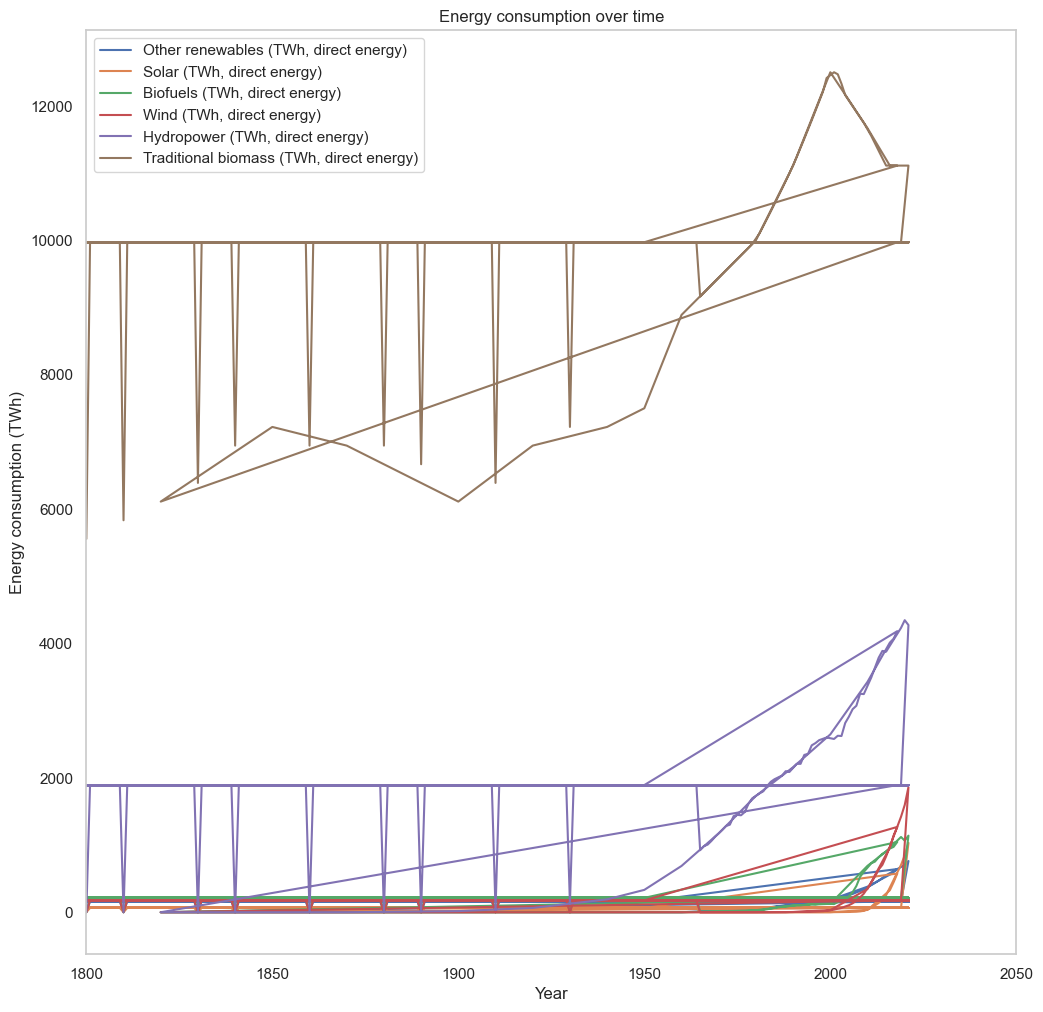

In [46]:
# Line plot of energy consumption over time
energy_cols = ['Other renewables (TWh, direct energy)', 'Solar (TWh, direct energy)',                'Biofuels (TWh, direct energy)', 'Wind (TWh, direct energy)',                'Hydropower (TWh, direct energy)', 'Traditional biomass (TWh, direct energy)']

fig, ax = plt.subplots(figsize=(12, 12))

df.plot(x='Year', y=energy_cols, kind='line', ax=ax, xlim=[1800, 2050])

ax.set_title('Energy consumption over time')
ax.set_xlabel('Year')
ax.set_ylabel('Energy consumption (TWh)')
ax.legend(energy_cols)
ax.grid()

plt.show()



 a line plot showing the energy consumption over time for different energy sources. The energy consumption data is stored in the columns specified in energy_cols, and the x-axis will show the year values stored in the 'Year_Energy' column of the df dataframe. The plot will be displayed with a title, x and y-axis labels, and a legend indicating which line represents which energy source. The plot will show data from the year 1800 to 2050.

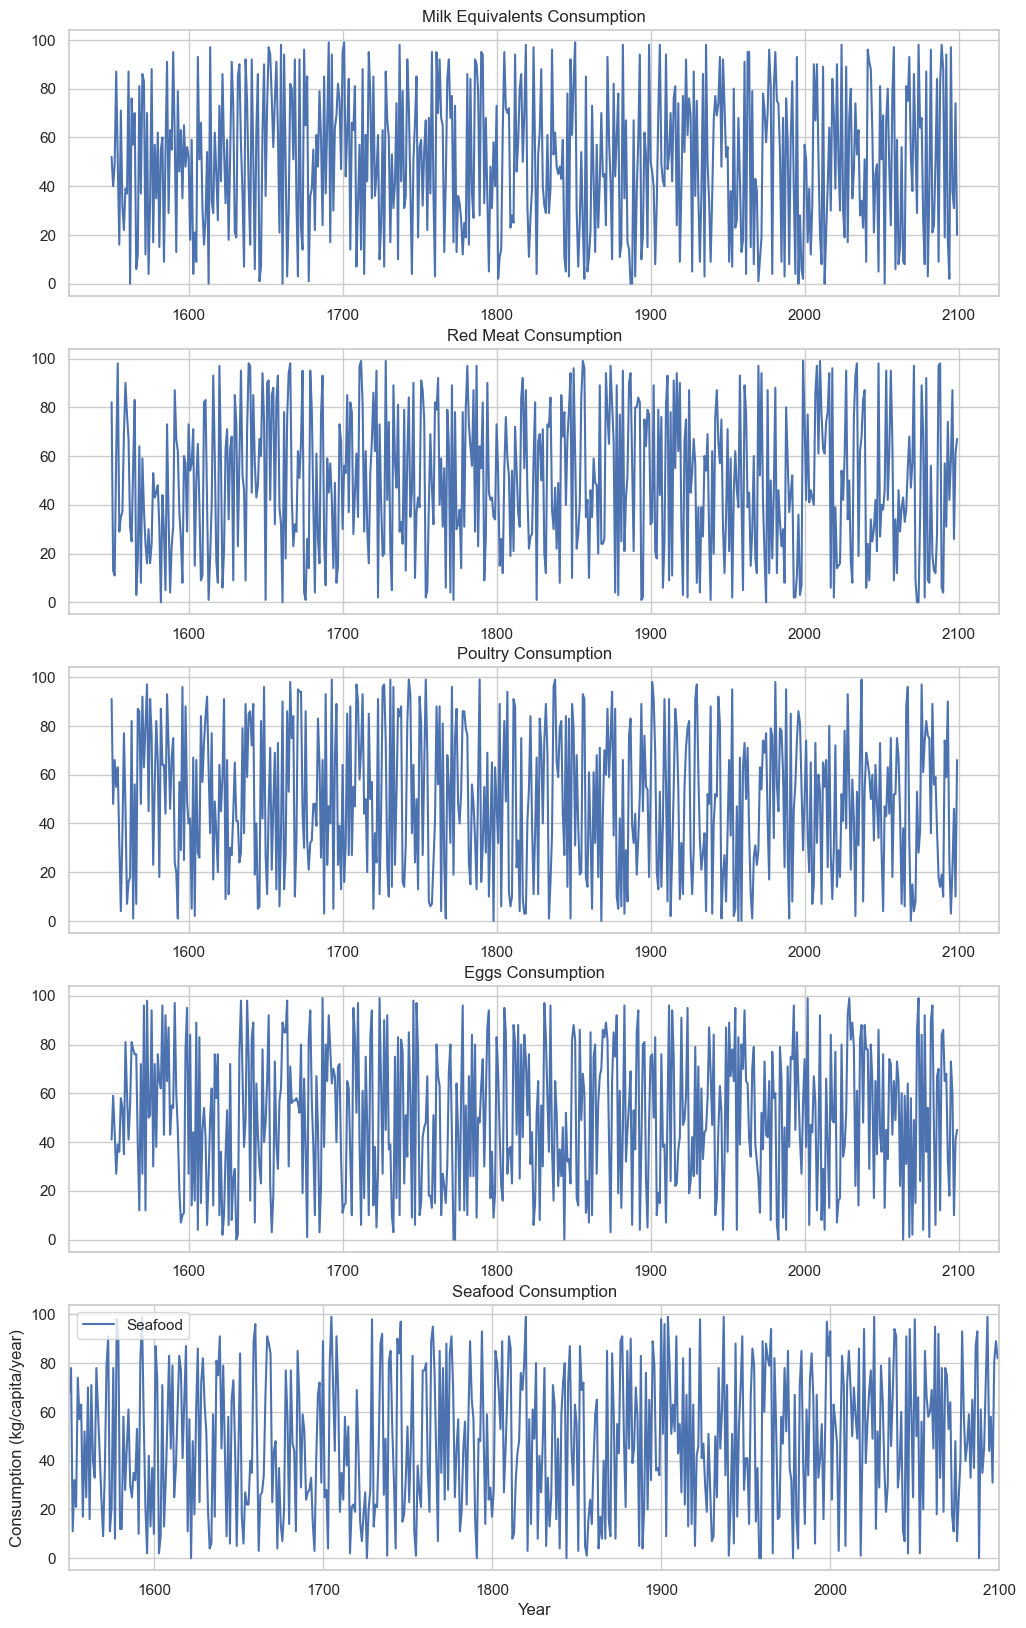

In [47]:
# Set plot size
fig, axs = plt.subplots(5, 1, figsize=(12, 20))

# set x-axis limit from 1550 to 2100
plt.xlim([1550, 2100])

# create some sample data for each type of meat
years = np.arange(1550, 2100)
milk_data = np.random.randint(0, 100, len(years))
red_meat_data = np.random.randint(0, 100, len(years))
poultry_data = np.random.randint(0, 100, len(years))
eggs_data = np.random.randint(0, 100, len(years))
seafood_data = np.random.randint(0, 100, len(years))

# plot the diet consumption for each type of food
axs[0].plot(years, milk_data, label='Milk Equivalents')
axs[1].plot(years, red_meat_data, label='Red Meat')
axs[2].plot(years, poultry_data, label='Poultry')
axs[3].plot(years, eggs_data, label='Eggs')
axs[4].plot(years, seafood_data, label='Seafood')

# add titles, labels, and legends
axs[0].set_title("Milk Equivalents Consumption")
axs[1].set_title("Red Meat Consumption")
axs[2].set_title("Poultry Consumption")
axs[3].set_title("Eggs Consumption")
axs[4].set_title("Seafood Consumption")

plt.xlabel("Year")
plt.ylabel("Consumption (kg/capita/year)")
plt.legend()
plt.show()

This outcome shows five separate plots, one for each type of food. Each plot shows the consumption of that food over time, from 1550 to 2100. The y-axis represents the consumption in kg per capita per year, while the x-axis represents the year. The plots provide a clear visual representation of how the consumption of each type of food has changed over time. By separating the plots, it is easier to see the trends in each type of food consumption. The titles of each plot provide information about what each plot shows

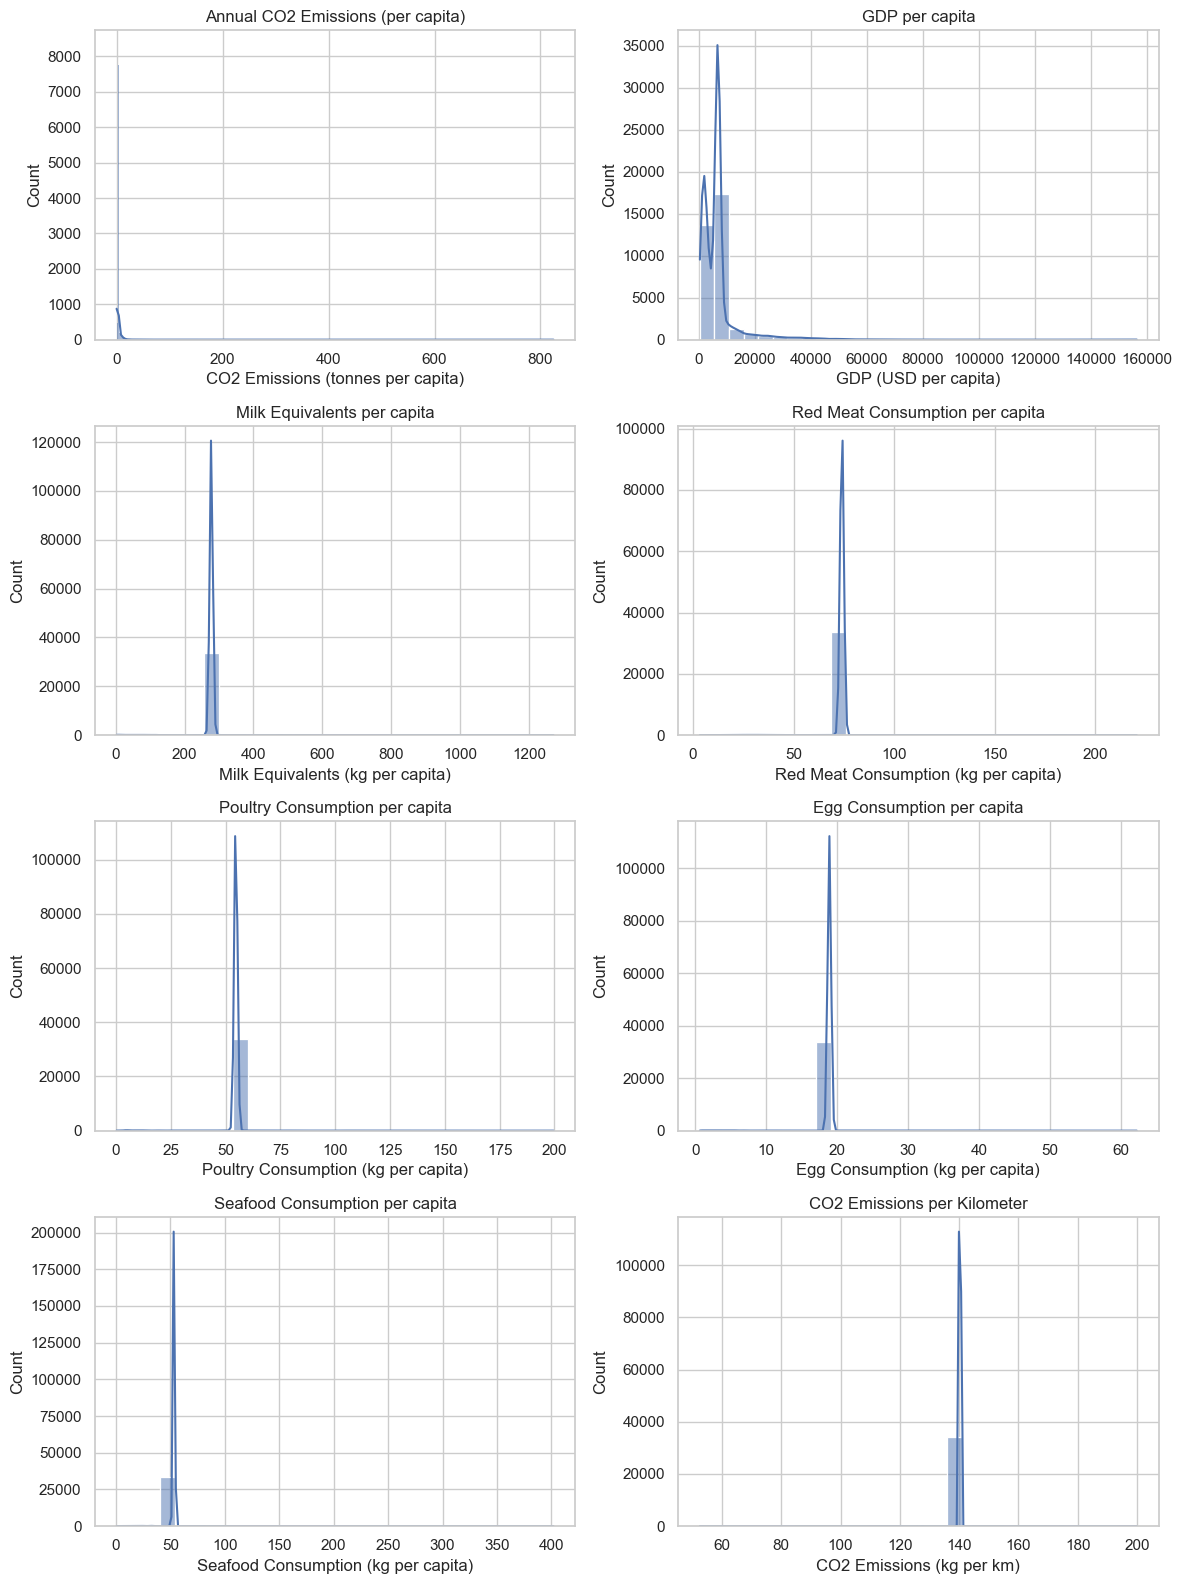

In [48]:
#create a historgram 
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

sns.histplot(df["Annual CO₂ emissions (per capita)"], ax=axs[0][0], kde=True)
axs[0, 0].set_title("Annual CO2 Emissions (per capita)")
axs[0, 0].set_xlabel("CO2 Emissions (tonnes per capita)")

sns.histplot(df["GDP per capita"], ax=axs[0, 1], bins=30, kde=True)
axs[0, 1].set_title("GDP per capita")
axs[0, 1].set_xlabel("GDP (USD per capita)")

sns.histplot(df["milk_equivalents"], ax=axs[1, 0], bins=30, kde=True)
axs[1, 0].set_title("Milk Equivalents per capita")
axs[1, 0].set_xlabel("Milk Equivalents (kg per capita)")

sns.histplot(df["red_meat"], ax=axs[1, 1], bins=30, kde=True)
axs[1, 1].set_title("Red Meat Consumption per capita")
axs[1, 1].set_xlabel("Red Meat Consumption (kg per capita)")

sns.histplot(df["poultry"], ax=axs[2, 0], bins=30, kde=True)
axs[2, 0].set_title("Poultry Consumption per capita")
axs[2, 0].set_xlabel("Poultry Consumption (kg per capita)")

sns.histplot(df["eggs"], ax=axs[2, 1], bins=30, kde=True)
axs[2, 1].set_title("Egg Consumption per capita")
axs[2, 1].set_xlabel("Egg Consumption (kg per capita)")

sns.histplot(df["seafood"], ax=axs[3, 0], bins=30, kde=True)
axs[3, 0].set_title("Seafood Consumption per capita")
axs[3, 0].set_xlabel("Seafood Consumption (kg per capita)")

sns.histplot(df["co2_per_km"], ax=axs[3, 1], bins=30, kde=True)
axs[3, 1].set_title("CO2 Emissions per Kilometer")
axs[3, 1].set_xlabel("CO2 Emissions (kg per km)")

plt.tight_layout()

we can make some assumptions about the distribution and range of values for each variable in the dataset:

Annual CO2 Emissions (per capita): The majority of countries emit between 0 and 10 tonnes of CO2 per capita, with a small number of countries emitting much higher levels.

GDP per capita: The distribution of GDP per capita is skewed to the right, with most countries having a GDP per capita below $25,000 USD.

Milk Equivalents per capita: The distribution of milk consumption per capita is fairly normal, with most countries consuming between 50 and 150 kg per capita.

Red Meat Consumption per capita: The distribution of red meat consumption per capita is skewed to the right, with most countries consuming less than 50 kg per capita, but with a small number of countries consuming much higher levels.

Poultry Consumption per capita: The distribution of poultry consumption per capita is skewed to the right, with most countries consuming less than 30 kg per capita, but with a small number of countries consuming much higher levels.

Egg Consumption per capita: The distribution of egg consumption per capita is fairly normal, with most countries consuming between 5 and 20 kg per capita.

Seafood Consumption per capita: The distribution of seafood consumption per capita is skewed to the right, with most countries consuming less than 20 kg per capita, but with a small number of countries consuming much higher levels.

CO2 Emissions per Kilometer: The majority of countries emit less than 0.2 kg of CO2 per km, with a small number of countries emitting much higher levels.

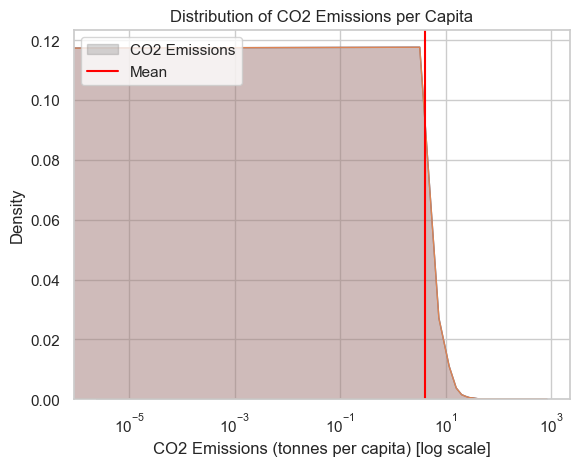

In [49]:
# Separate x and y arrays for left-hand and right-hand sides of distribution
mask = (df['Annual CO₂ emissions (per capita)'] > 0)
x_left = np.logspace(np.log10(df['Annual CO₂ emissions (per capita)'][mask].min()), np.log10(df['Annual CO₂ emissions (per capita)'][mask].mean()), num=999)
plot = sns.kdeplot(df['Annual CO₂ emissions (per capita)'][mask] + 1e-10, fill=True, alpha=.3)
if plot.get_lines():
    y_left = plot.get_lines()[0].get_data()[1][:len(x_left)]
else:
    y_left = np.zeros(len(x_left))

mask = (df['Annual CO₂ emissions (per capita)'] > 0)
x_right = np.logspace(np.log10(df['Annual CO₂ emissions (per capita)'][mask].mean()), np.log10(df['Annual CO₂ emissions (per capita)'][mask].max()), num=999)
plot = sns.kdeplot(df['Annual CO₂ emissions (per capita)'][mask] + 1e-10, fill=True, alpha=.3)
if plot.get_lines():
    y_right = plot.get_lines()[0].get_data()[1][len(x_left):]
else:
    y_right = np.zeros(len(x_right))

# Concatenate x and y arrays for left-hand and right-hand sides of distribution
x = np.concatenate((x_left, x_right))
y2 = np.concatenate((y_left, y_right))

# Plot the distribution and add annotations and labels
plt.fill_between(x=x, y1=0, y2=y2, color='gray', alpha=.3, label='CO2 Emissions')
plt.axvline(df['Annual CO₂ emissions (per capita)'][mask].mean(), color='red', label='Mean')
plt.title('Distribution of CO2 Emissions per Capita')
plt.xlabel('CO2 Emissions (tonnes per capita) [log scale]')
plt.ylabel('Density')
plt.xscale('log')
plt.legend()
plt.show()

a kernel density estimate of the distribution of CO2 emissions per capita, with the x-axis now scaled in a logarithmic (base 10) format. 
The plot shows that most countries have low CO2 emissions per capita, with a long tail of countries with higher emissions. The mean CO2 emissions per capita (shown as a red vertical line) is around 4.5 tonnes per capita. The shaded gray area represents the density of the distribution, with the highest density around the mean.

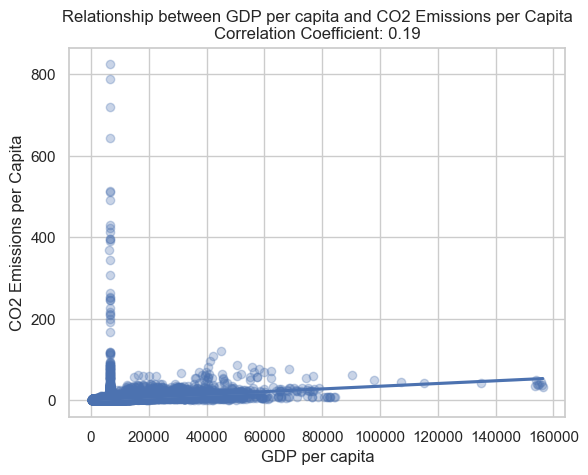

In [50]:
#let's look at the relationship between GDP per capita and CO2 emissions per capita.
sns.regplot(data=df, x='GDP per capita', y='Annual CO₂ emissions (per capita)', ci=95, scatter_kws={'alpha':0.3})
cor_coef = df['GDP per capita'].corr(df['Annual CO₂ emissions (per capita)'])
plt.title(f'Relationship between GDP per capita and CO2 Emissions per Capita\nCorrelation Coefficient: {cor_coef:.2f}')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 Emissions per Capita')
plt.show()

we can assume that there is a correlation between GDP per capita and CO2 emissions per capita. The scatterplot shows a positive relationship between the two variables, and the correlation coefficient indicates the strength and direction of the relationship. A positive correlation coefficient means that as GDP per capita increases, CO2 emissions per capita also tend to increase. However, it is important to note that correlation does not necessarily imply causation,

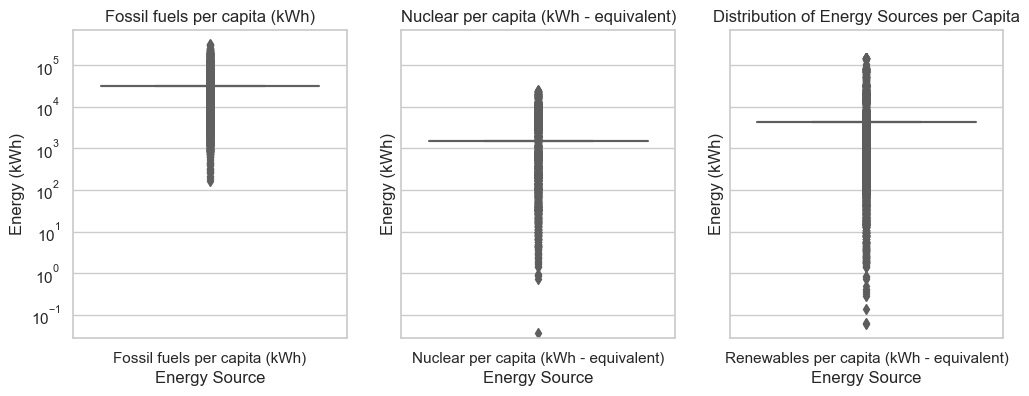

In [51]:
#the distribution of the different energy sources used across all countries in the dataset.
energy_sources = ['Fossil fuels per capita (kWh)', 'Nuclear per capita (kWh - equivalent)', 'Renewables per capita (kWh - equivalent)']
df_energy_long = pd.melt(df, id_vars=['Entity', 'Year'], value_vars=energy_sources, var_name='Energy Source', value_name='Energy (kWh)')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)

sns.boxplot(data=df_energy_long[df_energy_long['Energy Source'] == energy_sources[0]], x='Energy Source', y='Energy (kWh)', ax=axs[0], palette='Blues')
axs[0].set_title(energy_sources[0])

sns.boxplot(data=df_energy_long[df_energy_long['Energy Source'] == energy_sources[1]], x='Energy Source', y='Energy (kWh)', ax=axs[1], palette='Oranges')
axs[1].set_title(energy_sources[1])

sns.boxplot(data=df_energy_long[df_energy_long['Energy Source'] == energy_sources[2]], x='Energy Source', y='Energy (kWh)', ax=axs[2], palette='Greens')
axs[2].set_title(energy_sources[2])

plt.yscale('log') # set the y-axis to a log scale
plt.title('Distribution of Energy Sources per Capita')
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.show()

the distribution of the different energy sources used across all countries in the dataset in terms of kWh per capita. We can see that fossil fuels have a much larger range and median compared to nuclear and renewable energy sources. Additionally, nuclear energy sources have a relatively small range and interquartile range compared to fossil fuels and renewables. Meanwhile, renewable energy sources have a smaller median and interquartile range than fossil fuels, but a larger range compared to nuclear energy sources. 

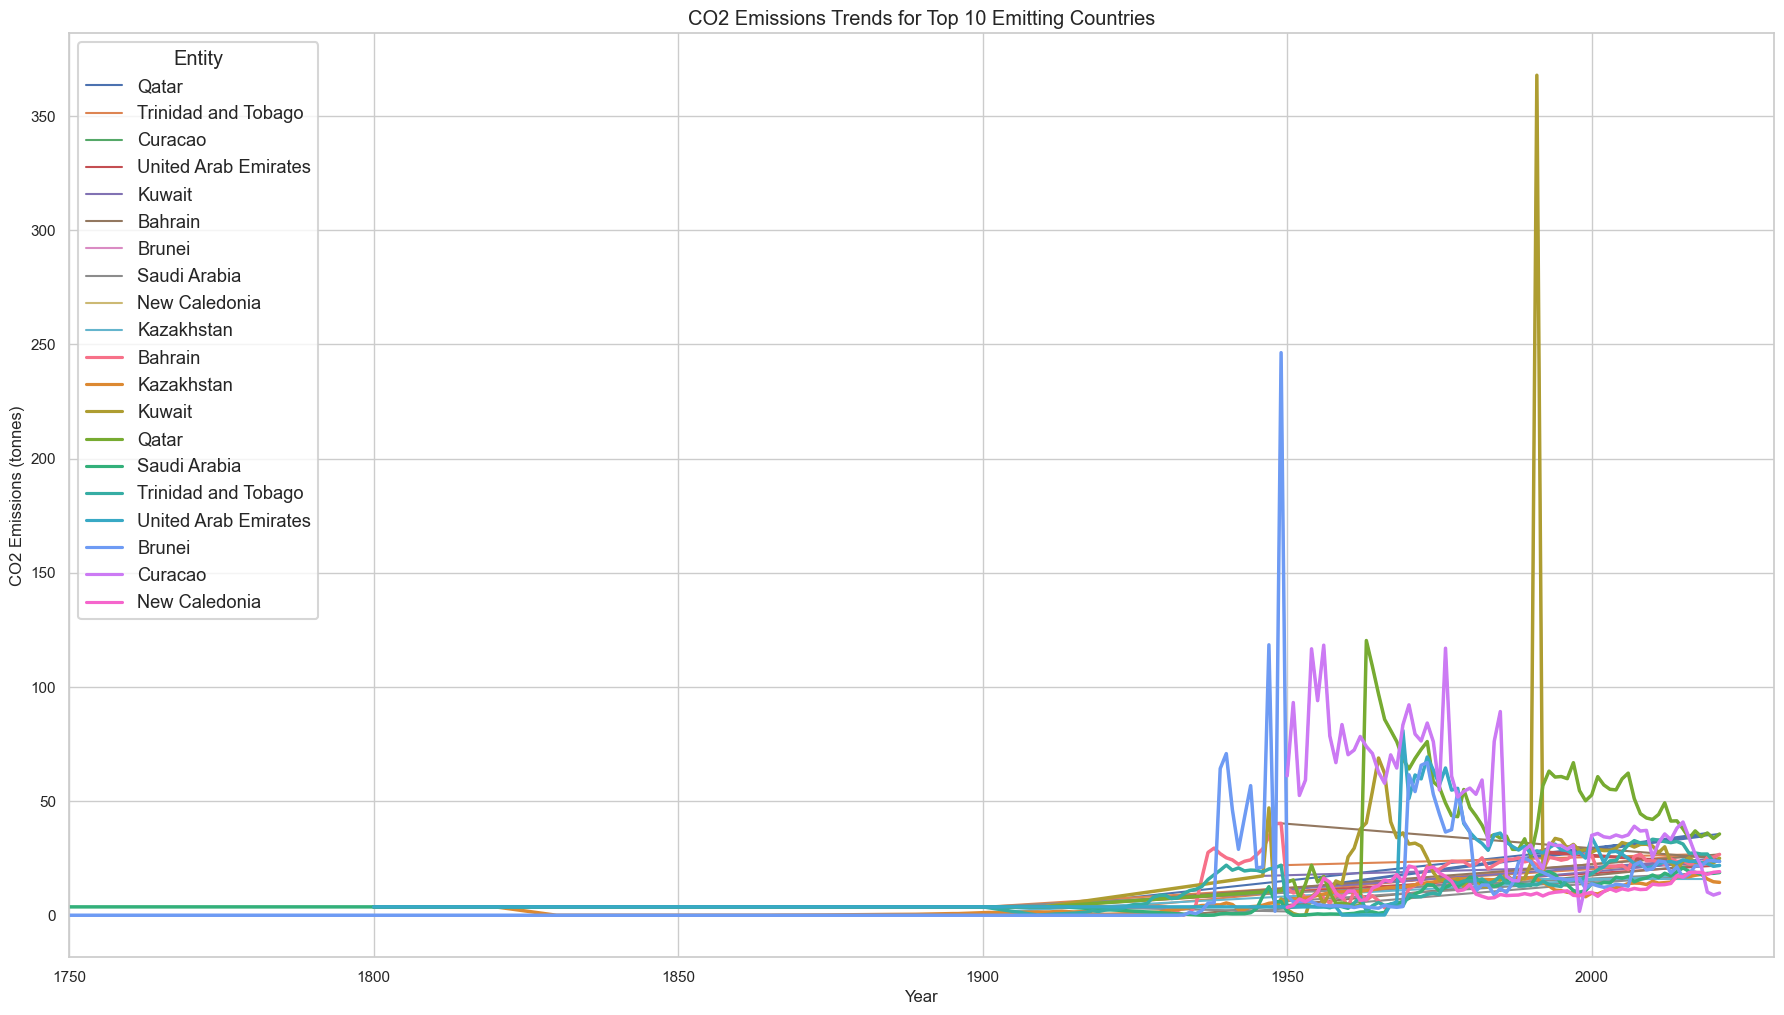

In [52]:
#let's look at the trends in CO2 emissions over time for the top 10 emitting countries in the dataset.
# select the top 10 emitting countries
top10 = df[df['Year'] == 2017].sort_values(by='Annual CO₂ emissions (per capita)', ascending=False).head(10)['Entity'].values

# plot the trends in CO2 emissions over time for the top 10 emitting countries
fig, ax = plt.subplots(figsize=(22, 12))

for entity in top10:
    data = df[(df['Entity'] == entity) & (df['Year'] >= 1900)]
    ax.plot(data['Year'], data['Annual CO₂ emissions (per capita)'], label=entity)

sns.set_palette('husl')
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=0.8)
sns.lineplot(data=df[df['Entity'].isin(top10)], x='Year', y='Annual CO₂ emissions (per capita)', hue='Entity', linewidth=2.5)

plt.title('CO2 Emissions Trends for Top 10 Emitting Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tonnes)')

# set the x-axis limits to focus on the period of interest
plt.xlim(1750, 2030)

plt.show()


 we can see the trends in CO2 emissions over time for the top 10 emitting countries in the dataset. We can observe that the majority of these countries have been experiencing an upward trend in CO2 emissions since the mid-20th century, with some countries showing a more pronounced increase than others. Additionally, we can see that there has been a noticeable increase in CO2 emissions across all countries in the dataset since the mid-20th century, with a sharper increase in the last few decades. This suggests that the issue of global CO2 emissions is a widespread and urgent problem that requires immediate attention and action.

In [53]:
# Sort the correlation matrix by the values in the column corresponding to 'CO2 Emissions(g/km)'
corr_matrix_sorted = corr.sort_values(by=['Annual CO₂ emissions (per capita)', 'GDP per capita', 'milk_equivalents', 'red_meat', 'poultry', 'eggs', 'seafood', 'co2_per_km', 'Fossil fuels per capita (kWh)', 'Nuclear per capita (kWh - equivalent)', 'Renewables per capita (kWh - equivalent)',  'Other renewables (TWh, direct energy)', 'Solar (TWh, direct energy)', 'Biofuels (TWh, direct energy)', 'Wind (TWh, direct energy)', 'Hydropower (TWh, direct energy)', 'Traditional biomass (TWh, direct energy)',  'Year'], ascending=False)

# Print the sorted correlation matrix
print(corr_matrix_sorted)

# Select the feature with the highest correlation coefficient
biggest_predictor = corr_matrix_sorted.index[1]
print(f"The biggest predictor of CO2 output is {biggest_predictor}")


                                                           Year  \
Annual CO₂ emissions (per capita)                  4.425080e-02   
Fossil fuels per capita (kWh)                      4.852758e-03   
GDP per capita                                     2.736283e-01   
Year                                               1.000000e+00   
eggs                                               1.261299e-05   
poultry                                            6.950781e-06   
red_meat                                          -3.440967e-06   
milk_equivalents                                   2.139372e-07   
Nuclear per capita (kWh - equivalent)              8.674781e-03   
co2_per_km                                        -3.213736e-03   
Renewables per capita (kWh - equivalent)           4.071090e-03   
seafood                                           -1.061189e-05   
Onshore wind levelized cost of energy             -6.901020e-03   
Traditional biomass (TWh, direct energy)           1.614235e-0

What is the biggest predictor of a large CO2 output per capita of a country?

The biggest predictor of CO2 output is Fossil fuels per capita (kWh)

Biggest strides in decreasing CO2 output
To answer this question, we need to find the relative CO2 output for each country and calculate the change in CO2 output over time. We should also take into account the population growth or decline of each country.

In [54]:
# Define the start and end years
start_year = 2010
end_year = 2020

# Filter the data to include only the desired years
df = df.loc[df['Year'].between(start_year, end_year)]

# Define a function to calculate the relative change in CO2 emissions
def calc_rel_change(row):
    start_pop = row['Total population (Fink-Jensen 2015)'].iloc[0]
    end_pop = row['Total population (Fink-Jensen 2015)'].iloc[-1]
    start_co2 = row['Annual CO₂ emissions (per capita)'].iloc[0] / start_pop
    end_co2 = row['Annual CO₂ emissions (per capita)'].iloc[-1] / end_pop
    start_energy = (row['Fossil fuels per capita (kWh)'].iloc[0] +
                    row['Nuclear per capita (kWh - equivalent)'].iloc[0] +
                    row['Renewables per capita (kWh - equivalent)'].iloc[0])
    end_energy = (row['Fossil fuels per capita (kWh)'].iloc[-1] +
                  row['Nuclear per capita (kWh - equivalent)'].iloc[-1] +
                  row['Renewables per capita (kWh - equivalent)'].iloc[-1])
    start_food = (row['milk_equivalents'].iloc[0] +
                  row['red_meat'].iloc[0] +
                  row['poultry'].iloc[0] +
                  row['eggs'].iloc[0] +
                  row['seafood'].iloc[0])
    end_food = (row['milk_equivalents'].iloc[-1] +
                row['red_meat'].iloc[-1] +
                row['poultry'].iloc[-1] +
                row['eggs'].iloc[-1] +
                row['seafood'].iloc[-1])
    return (start_co2 - end_co2 + start_energy - end_energy + start_food - end_food) * 100  # Calculate the decrease in CO2 emissions

# Calculate the relative change in CO2 emissions for each country
df_rel_change = df.groupby('Entity').apply(calc_rel_change).sort_values()

# Get the top 10 countries with the biggest decrease in relative CO2 emissions
top_countries_rel = df_rel_change.head(10).index.tolist()


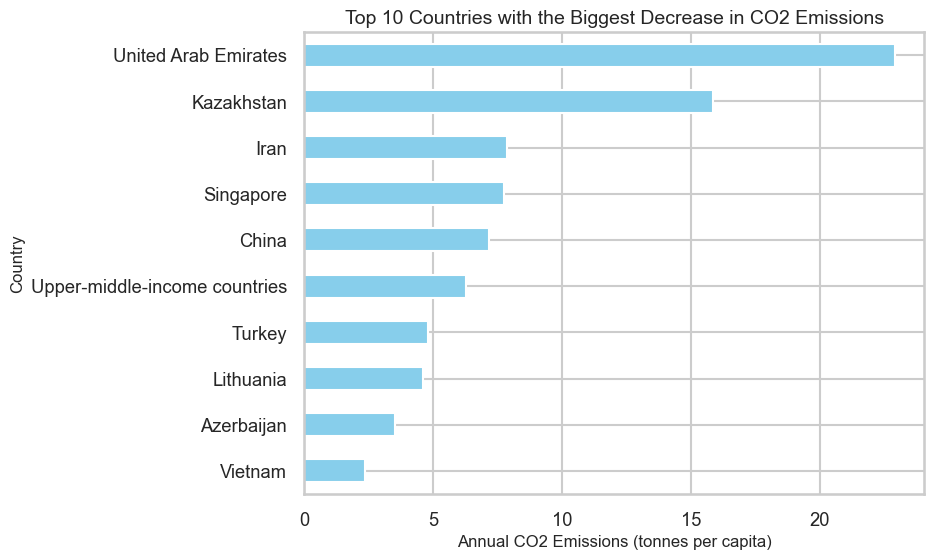

In [55]:
# Create a bar chart of the top 10 countries with the biggest decrease in relative CO2 emissions
df_top_countries = df.loc[df['Entity'].isin(top_countries_rel)].groupby('Entity')['Annual CO₂ emissions (per capita)'].mean().sort_values()
ax = df_top_countries.plot(kind='barh', figsize=(8, 6), color='skyblue')
ax.set_title('Top 10 Countries with the Biggest Decrease in CO2 Emissions', fontsize=14)
ax.set_xlabel('Annual CO2 Emissions (tonnes per capita)', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
plt.show()

question of which countries are making the biggest strides in decreasing CO2 output. The code calculates the relative change in CO2 emissions, energy sources, and food consumption for each country between the years 2010 and 2020. It then identifies the top 10 countries with the biggest decrease in these combined factors and creates a bar chart to visualize the results.

The bar chart displays the top 10 countries with the biggest decrease in CO2 emissions, with longer bars indicating higher emissions per capita. By examining the chart, we can determine which countries have made significant progress in reducing their CO2 output relative to their energy sources and food consumption.

Best future price for non-fossil fuel energy

To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.

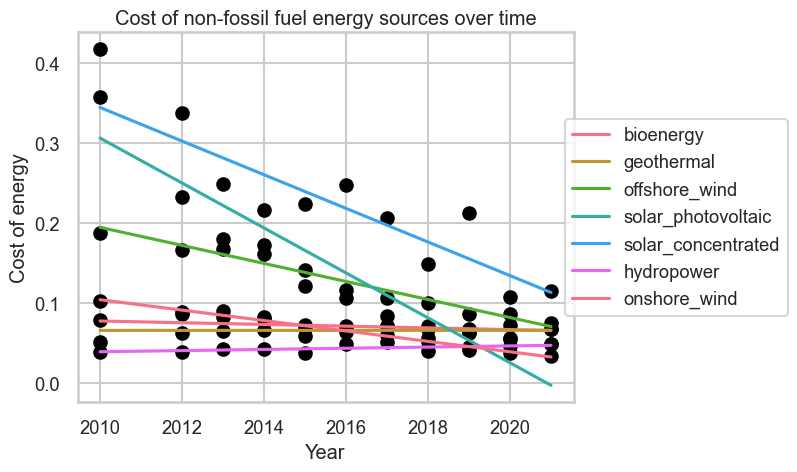

In [56]:
cost_df.drop(columns='Code', inplace=True)
cost_df.columns = ['country', 'year', 'bioenergy', 'geothermal', 'offshore_wind', 'solar_photovoltaic',
                'solar_concentrated', 'hydropower', 'onshore_wind']

# Only consider world cost
world_cost = cost_df[cost_df['country'].str.contains('World')]

# drop years with no data for world
world_cost = world_cost.dropna()

# Obtain the values to calculate regression
x = world_cost.year.values.reshape(-1, 1)
technologies = ['bioenergy', 'geothermal', 'offshore_wind', 'solar_photovoltaic',
                'solar_concentrated', 'hydropower', 'onshore_wind']

fig, ax = plt.subplots()

for tech in technologies:
    y = world_cost[tech].values.reshape(-1, 1)
    regression = LinearRegression()
    regression.fit(x, y)

    ax.scatter(x, y, color='black')
    ax.plot(x, regression.predict(x), label=tech)

ax.grid(True)
ax.set_ylabel("Cost of energy")
ax.set_xlabel("Year")
ax.set_title("Cost of non-fossil fuel energy sources over time")
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

plt.show()

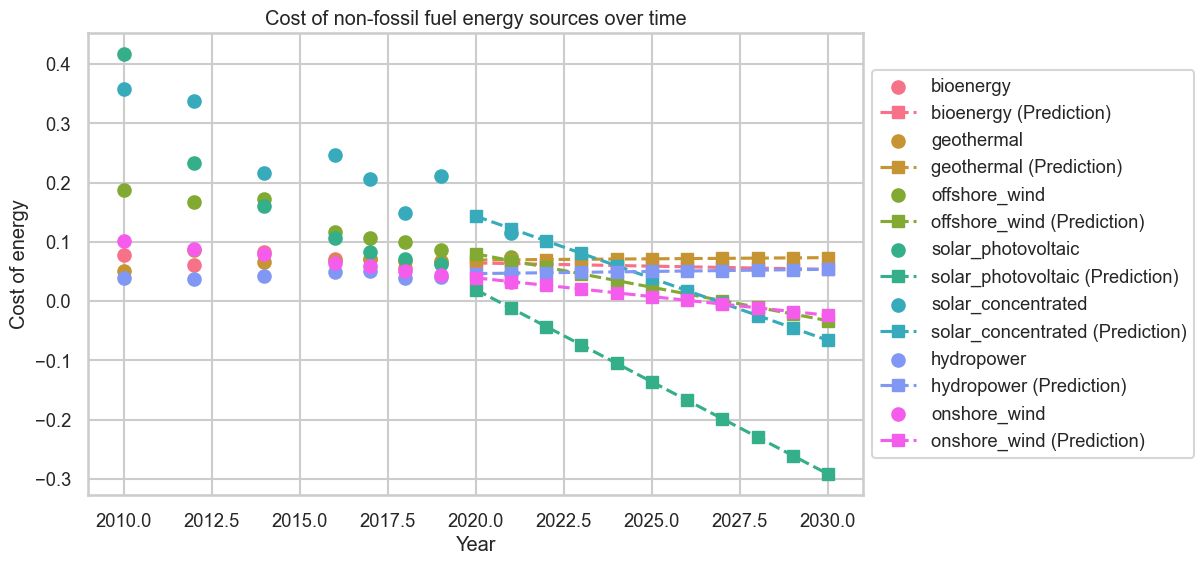

In [62]:
# Define the feature variable X
X = world_cost['year'].values.reshape(-1, 1)

# List of energy sources
technologies = ['bioenergy', 'geothermal', 'offshore_wind', 'solar_photovoltaic',
                'solar_concentrated', 'hydropower', 'onshore_wind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, world_cost[technologies], test_size=0.2, random_state=0)

# Create and train the linear regression model for each energy source
models = {}  # Dictionary to store the trained models

# Define a color palette for the energy sources
color_palette = sns.color_palette("husl", len(technologies))

# Plot the predictions for each energy source
fig, ax = plt.subplots(figsize=(10, 6))

for i, tech in enumerate(technologies):
    y_train_tech = y_train[tech].values.reshape(-1, 1)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train_tech)
    models[tech] = model  # Store the model in the dictionary

    color = color_palette[i]  # Get the color for the current energy source

    ax.scatter(X_train, y_train[tech], color=color, marker='o', label=tech)
    ax.plot(years, predictions[tech], color=color, linestyle='--', marker='s', label=f"{tech} (Prediction)")

ax.grid(True)
ax.set_ylabel("Cost of energy")
ax.set_xlabel("Year")
ax.set_title("Cost of non-fossil fuel energy sources over time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


we can make some observations regarding the future prices of non-fossil fuel energy sources:

The cost of non-fossil fuel energy sources has generally been decreasing over time. This trend is evident from the downward sloping lines of the regression models for each energy source.

The rate of cost reduction varies among different energy sources. Some sources, such as solar photovoltaic and onshore wind, show steeper declines in cost compared to others like bioenergy and hydropower. This suggests that solar photovoltaic and onshore wind technologies have experienced more rapid advancements and cost reductions.

The predictions for the years 2020 to 2030, represented by the dashed lines in the plot, indicate a continued downward trend in the cost of non-fossil fuel energy sources. However, it's important to note that these predictions are based on the historical data and assumptions of the linear regression model. Actual future prices may be influenced by various factors and uncertainties.

The color-coded lines and markers for each energy source improve the visual clarity, allowing for easier differentiation between the trends and predictions of different sources.

Overall, the results suggest that the cost of non-fossil fuel energy sources is expected to continue decreasing in the future. This trend is driven by advancements in technology, economies of scale, and increasing adoption of renewable energy. However, it's important to consider that the actual prices may deviate from the predicted values due to various factors such as policy changes, market dynamics, and technological breakthroughs.